<h1>IMPORTANDO AS BIBLIOTECAS NECESSARIAS</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

<h1>DEFININDO O ESTILO E A APARENCIA DA SIMULAÇÃO</h1>

In [2]:
plt.style.use('dark_background')
plt.rc('font', size=15)

<h1>IMPORTANDO UMA BASE DE DADOS FICTICIA PARA O TRABBALHO</h1> Uma base de dados real poderia ser importada no site de um observatorio ou universidade por exemplo

In [3]:
data = pd.read_csv('Asteroides_data.txt', sep = ',')
data

,dist,angle,dist_err
0,2.12692,120.0,0.106346
1,2.13106,122.5,0.106553
2,2.26023,127.3,0.113012
3,2.41057,129.1,0.120529
4,3.33049,170.4,0.166524
5,3.54764,171.8,0.177382
6,3.43319,173.3,0.171659
7,3.52295,175.9,0.176147


<h1>CRIANDO O MODELO PARA REALIZAR OS CALCULOS</h1> Construindo um mapa circular como um "mapa" do sistema solar e posicionando a terra e o sol

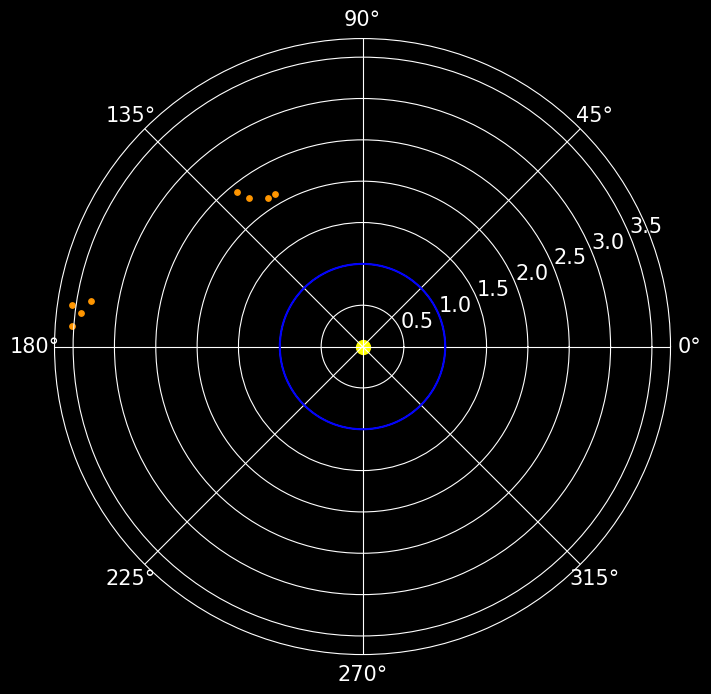

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.scatter(data['angle'] * np.pi/180, data['dist'], color= '#FF9600', s = 15)

theta = np.linspace(0,2*np.pi,1000)
raio_orbita_terra = 1

ax.plot(theta, np.repeat(raio_orbita_terra, 1000), color='blue')
ax.scatter(0, 0, marker='o', color='yellow', s=100)

plt.show()

<h1>ESTIMANDO POSSIVEIS TRAGETORIAS DE ELIPSES PARA DETERMINAR A ROTA DO ASTEROIDE</h1>
Para isso será usado o metodo matemático chamdo "Teste do Qui Quadrado" para determinar os parametros matematicos que descrevem uma elipse 

In [8]:
def chi2_polar(theta_obs, r_obs, r_err, ai_guess, af_guess, bi_guess, bf_guess, steps, precision):
    start = time.time()
    interation = 0
    while((af_guess - ai_guess)/np.mean([ai_guess, af_guess]) >= precision) and ((bf_guess - bi_guess)/np.mean([bi_guess, bf_guess]) >= precision):
        chi2 = np.zeros(shape= (steps, steps))
        a_tests = np.linspace(ai_guess, af_guess, steps)
        b_tests = np.linspace(bi_guess, bf_guess, steps)

        for i in range(steps):
            for j in range(steps):
                e = np.sqrt(a_tests[i]**2 - b_tests[j]**2)/a_tests[i]
                chi2[i][j] = np.sum(((r_obs - (a_tests[i]*(1 - e**2) / (1 + e*np.cos(theta_obs)))) / r_err)**2)
        a_min_pos = np.where(chi2 == np.min(chi2))[0][0]
        a_value = a_tests[a_min_pos]
        ai_guess = a_value - 0.2*a_value/(interation + 1)
        af_guess = a_value + 0.2*a_value/(interation + 1)
        b_min_pos = np.where(chi2 == np.min(chi2))[1][0]
        b_value = b_tests[b_min_pos]
        bi_guess = b_value - 0.2*b_value/(interation + 1)
        bf_guess = b_value + 0.2*b_value/(interation + 1)
        print('Valores ajustados: a = ' + str(a_value) + ' b = ' + str(b_value))
        interation += 1
    end = time.time()
    print('Tempo de simulação: ' + str(end-start) + 'segundos. ' + str(100*precision) + '%' + ' de precisão na simualação. ' + str(interation) + ' interações e ' + str(interation*steps**2) + ' elipses testadas')
    return [a_value, b_value]

In [9]:
a,b = chi2_polar(data['angle']*np.pi/180, data['dist'], data['dist_err'], 1.0, 3.0, 0.2, 1.0, 20, 0.01)

Valores ajustados: a = 1.736842105263158 b = 1.0
Valores ajustados: a = 1.8282548476454297 b = 1.2
Valores ajustados: a = 1.9148563930602132 b = 1.3199999999999998
Valores ajustados: a = 1.9753255423147464 b = 1.408
Valores ajustados: a = 2.022109568316938 b = 1.4784
Valores ajustados: a = 2.0604232232955746 b = 1.537536
Valores ajustados: a = 2.0929562215581363 b = 1.5887872
Valores ajustados: a = 2.1212819448574196 b = 1.63418112
Valores ajustados: a = 2.140820068033738 b = 1.6750356480000002
Valores ajustados: a = 2.1633550161183037 b = 1.7122586624000002
Valores ajustados: a = 2.1838499583762667 b = 1.7465038356480003
Valores ajustados: a = 2.1984786183845286 b = 1.7782584508416002
Valores ajustados: a = 2.2158350285296695 b = 1.8078960916889601
Valores ajustados: a = 2.228394417355344 b = 1.8327821107648405
Valores ajustados: a = 2.2267189328310164 b = 1.8314040791026114
Valores ajustados: a = 2.225156323053591 b = 1.8301188832576272
Valores ajustados: a = 2.226620241687179 b = 1.

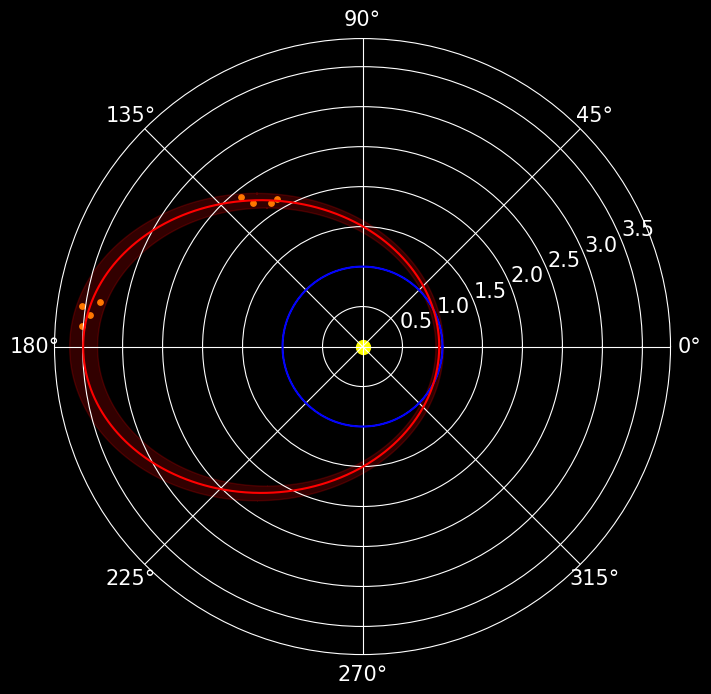

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.scatter(data['angle'] * np.pi/180, data['dist'], color= '#FF9600', s = 15)

theta = np.linspace(0,2*np.pi,1000)
raio_orbita_terra = 1

ax.plot(theta, np.repeat(raio_orbita_terra, 1000), color='blue')
ax.scatter(0, 0, marker='o', color='yellow', s=100)

e = np.sqrt(a**2 - b**2)/a
r = a*(1 - e**2)/(1 + e*np.cos(theta))
ax.plot(theta, r, color = 'red')

e1 = np.sqrt((a + 0.05*a)**2 - (b + 0.05*b)**2)/(a + 0.05*a)
r1 = (a + 0.05*a)*(1 - e1**2)/(1 + e1*np.cos(theta))
e2 = np.sqrt((a - 0.05*a)**2 - (b - 0.05*b)**2)/(a - 0.05*a)
r2 = (a - 0.05*a)*(1 - e1**2)/(1 + e1*np.cos(theta))

plt.fill_between(theta, r1, r2, alpha = 0.2, color='red')

plt.show()